In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
pd.options.mode.chained_assignment = None 

In [2]:
import os
import sys

In [3]:
sys.path.append(os.path.join(os.path.dirname('__file__'), 'utils'))

In [4]:
from functions import *

In [5]:
cw_d = "./dataset/inputs/"

In [6]:
ndvi_df = pd.read_csv(cw_d + "ndvi.csv")
nnirv_df = pd.read_csv(cw_d + "nnirv.csv")
ndvi_df.columns = ["date", "NDVI"]
nnirv_df = nnirv_df[["system:time_start", "NNIRV"]]
nnirv_df.columns = ["date", "NNIRV"]

In [7]:
nnirv_df

,date,NNIRV
0,27-Jan-18,"1,048.94"
1,27-Jan-18,811.749
2,4-Feb-18,966.929
3,6-Feb-18,"1,098.22"
4,8-Mar-18,"1,322.75"
...,...,...
270,2-Dec-20,"1,124.33"
271,2-Dec-20,978.772
272,5-Dec-20,"1,064.96"
273,25-Dec-20,900.695


In [8]:
#ndvi_df.isna().any()


In [9]:
#indexed_ndvi_df.head()

In [10]:
nnirv_dates_formated = [datetime.strptime(d ,"%d-%b-%y") for d in list(nnirv_df.date)]
ndvi_dates_formated = [datetime.strptime(d ,"%d-%b-%y") for d in list(ndvi_df.date)]

In [11]:
nnirv_df.NNIRV = [str_to_float(n) for n in nnirv_df.NNIRV]
ndvi_df.NDVI = [str_to_float(n) for n in ndvi_df.NDVI]

In [12]:
ndvi_df.date = ndvi_dates_formated 
nnirv_df.date = nnirv_dates_formated 
ndvi_df = ndvi_df.sort_values(by="date")
nnirv_df = nnirv_df.sort_values(by="date")

In [13]:
#for d in list(nnirv_df.date):
#    print(d)

In [14]:
ndvi_dates_col = [set_end_intevals(1, 16, d, d.month)  for d in list(ndvi_df.date)]
ndvi_df["date_intervals"] = ndvi_dates_col
ndvi_df

,date,NDVI,date_intervals
0,2018-01-27,No,2018-01-17
1,2018-01-27,No,2018-01-17
2,2018-02-04,No,2018-02-16
3,2018-02-06,No,2018-02-16
4,2018-03-08,No,2018-03-16
...,...,...,...
271,2020-12-02,No,2020-12-16
270,2020-12-02,No,2020-12-16
272,2020-12-05,No,2020-12-16
273,2020-12-25,No,2020-12-17


In [15]:
ndvi_years = [d.year for d in  list(ndvi_df.date)]

In [16]:
ndvi_df["years"] = ndvi_years 

In [17]:
ndvi_df.head()

,date,NDVI,date_intervals,years
0,2018-01-27,No,2018-01-17,2018
1,2018-01-27,No,2018-01-17,2018
2,2018-02-04,No,2018-02-16,2018
3,2018-02-06,No,2018-02-16,2018
4,2018-03-08,No,2018-03-16,2018


In [18]:
nnirv_dates_col = [set_end_intevals(1, 16, d, d.month)  for d in list(nnirv_df.date)]
nnirv_df["date_intervals"] = nnirv_dates_col
nnirv_df.head()

,date,NNIRV,date_intervals
0,2018-01-27,1048.940,2018-01-17
1,2018-01-27,811.749,2018-01-17
2,2018-02-04,966.929,2018-02-16
3,2018-02-06,1098.220,2018-02-16
4,2018-03-08,1322.750,2018-03-16


In [19]:
nnirv_years = [d.year for d in  list(nnirv_df.date)]

In [20]:
nnirv_df["years"] =nnirv_years

In [21]:
nnirv_df.date

0     2018-01-27
1     2018-01-27
2     2018-02-04
3     2018-02-06
4     2018-03-08
         ...    
271   2020-12-02
270   2020-12-02
272   2020-12-05
273   2020-12-25
274   2020-12-27
Name: date, Length: 275, dtype: datetime64[ns]

In [22]:
grouped_nnirv = nnirv_df.groupby(["years","date_intervals"])[["NNIRV"]].mean()
grouped_nnirv = grouped_nnirv.reset_index()

In [23]:
intervals = list(grouped_nnirv["date_intervals"])
new_inter = []

for d in intervals:
    new_inter.append(rename_intervals(1, 16, d, d.month))
    
#new_inter
#grouped_nnirv

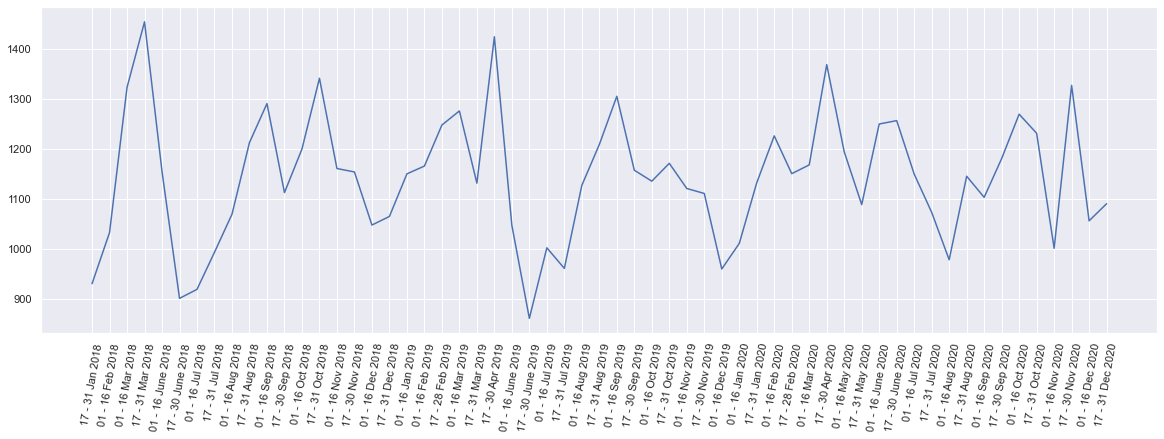

In [24]:
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots(sharey=True, sharex=True)
x_pos = np.arange(len(new_inter))
_ = ax.plot(list(grouped_nnirv["NNIRV"]))
ax.set_xticks(x_pos)
rects = ax.set_xticklabels(x_pos)
_ = ax.set_xticklabels(new_inter,  rotation = 80)